## **Linear Regression with One Variable: Predicting Trip Price Based on Distance**

In [1]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


# Data Preprocessing

## **1. Data inspection and cleaning**

##### **1.1. Identifying and handling Missing Values **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [5]:
#Handle missing target
df = df.dropna(subset=['Trip_Price']).reset_index(drop=True)

In [6]:
#Split data
X = df.drop('Trip_Price', axis=1)
Y = df['Trip_Price']

In [7]:
# Identify columns
num_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
           'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
cat_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

In [8]:
#Handle numerical data
# Impute missing values
num_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [9]:
#Handle Categorical data
# Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [10]:
X.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


##### **1.2. Checking Data Types of Columns in the Dataset **

In [11]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns:")
print("="*40)
print(df.dtypes)


Data Types of All Columns:
Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object


##### **1.3. Identifying and handling Outliers **


In [12]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,901.000000,903.000000,907.000000,907.000000,902.000000,905.000000,951.000000
mean,27.190998,2.479513,3.497100,1.229934,0.293902,62.044144,56.874773
std,20.155134,1.100983,0.866729,0.429958,0.115404,32.321578,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.630000,2.000000,2.730000,0.850000,0.190000,35.590000,33.742650
50%,25.870000,2.000000,3.510000,1.220000,0.290000,61.570000,50.074500
75%,38.680000,3.000000,4.230000,1.610000,0.390000,89.210000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


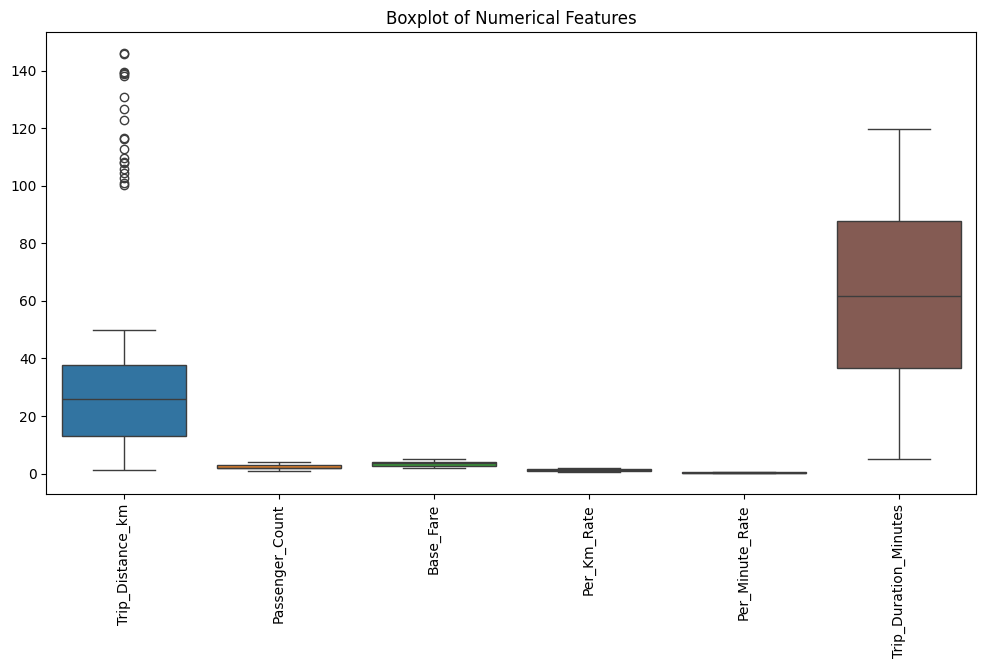

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X[num_cols])
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

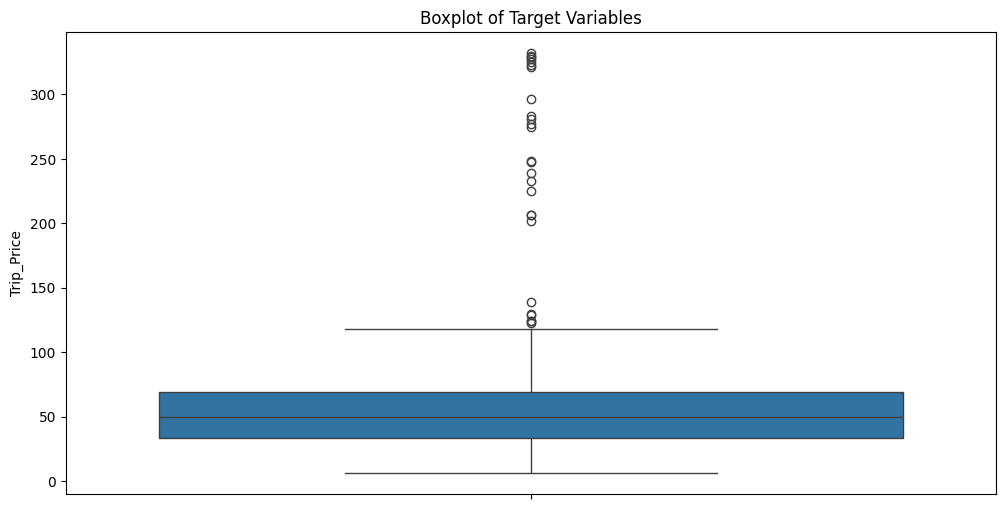

In [14]:

plt.figure(figsize=(12,6))
sns.boxplot(data=Y)
plt.title("Boxplot of Target Variables")
plt.show()

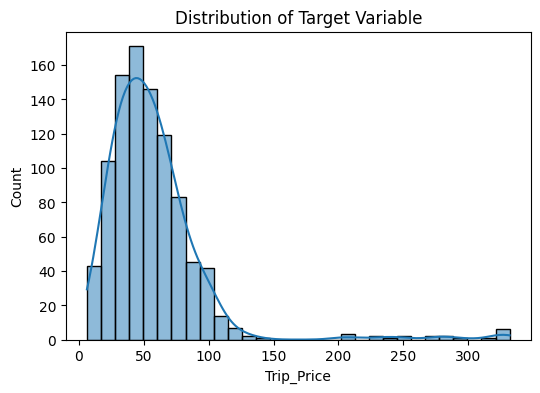

In [15]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.histplot(Y, bins=30, kde=True)  # Histogram with density curve
plt.title("Distribution of Target Variable")
plt.show()

* Right-Skewed Distribution: Most fares are between 20 to 100, but a few go beyond 200–300.
* Potential Outliers: There are very few values above 200, meaning these may be outliers or rare cases.

In [16]:
#Identify the Outliers Using IQR
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Y[(Y < lower_bound) | (Y > upper_bound)]
print(outliers)

19     201.869509
24     280.877302
60     320.958664
103    233.008285
104    274.535087
134    327.217666
212    328.871769
249    206.699570
250    276.840597
266    329.913004
281    325.098950
316    248.295209
386    206.508652
387    123.928000
455    322.725996
496    124.241600
506    296.088697
561    247.598318
589    332.043689
637    129.535600
690    122.418000
710    283.645201
714    128.654900
755    138.642500
757    239.171407
795    224.914663
Name: Trip_Price, dtype: float64


In [17]:
#Check if These Are Errors or Valid Data
print(X[Y > 200])  # Display trip details for fares > 200

     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
19         105.943550       Night     Weekend              2.0   
24         138.098328     Evening     Weekend              4.0   
60         146.067047   Afternoon     Weekday              2.0   
103        112.830958   Afternoon     Weekday              2.0   
104        102.747556     Evening     Weekday              2.0   
134        109.616082   Afternoon     Weekday              4.0   
212        130.809001   Afternoon     Weekday              1.0   
249        116.196064   Afternoon     Weekend              4.0   
250        139.062230   Afternoon     Weekday              2.0   
266        100.380420   Afternoon     Weekday              3.0   
281        145.747060     Morning     Weekday              3.0   
316        116.667681     Morning     Weekday              2.0   
386        104.371791   Afternoon     Weekday              1.0   
455        107.786832     Morning     Weekend              1.0   
506       

* These are valid data points, NOT errors and should not be removed.

In [18]:
#Confirm Outliers in Trip Distance
Q1 = df["Trip_Distance_km"].quantile(0.25)
Q3 = df["Trip_Distance_km"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Trip_Distance_km"] < lower_bound) | (df["Trip_Distance_km"] > upper_bound)]
print(outliers)

     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
19         105.943550       Night     Weekend              2.0   
24         138.098328     Evening     Weekend              4.0   
60         146.067047   Afternoon     Weekday              2.0   
103        112.830958   Afternoon     Weekday              2.0   
104        102.747556     Evening     Weekday              2.0   
134        109.616082   Afternoon     Weekday              4.0   
212        130.809001   Afternoon     Weekday              1.0   
249        116.196064   Afternoon     Weekend              4.0   
250        139.062230   Afternoon     Weekday              2.0   
266        100.380420   Afternoon     Weekday              3.0   
281        145.747060     Morning     Weekday              3.0   
316        116.667681     Morning     Weekday              2.0   
386        104.371791         NaN     Weekday              1.0   
455        107.786832     Morning     Weekend              1.0   
506       

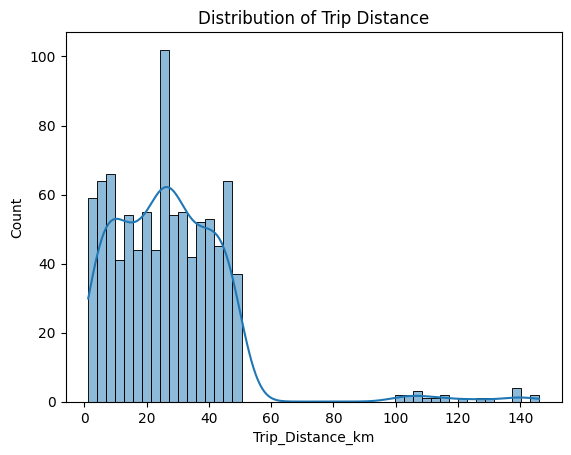

In [19]:
#Check the distribution using a histogram plot to see if the data is heavily skewed.
sns.histplot(X["Trip_Distance_km"], bins=50, kde=True)
plt.title("Distribution of Trip Distance")
plt.show()

In [20]:
#Check the Outlier Threshold
Q1 = df["Trip_Distance_km"].quantile(0.25)
Q3 = df["Trip_Distance_km"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers: {upper_bound} km")
print(df[df["Trip_Distance_km"] > upper_bound])  # View outliers

Upper bound for outliers: 77.755 km
     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
19         105.943550       Night     Weekend              2.0   
24         138.098328     Evening     Weekend              4.0   
60         146.067047   Afternoon     Weekday              2.0   
103        112.830958   Afternoon     Weekday              2.0   
104        102.747556     Evening     Weekday              2.0   
134        109.616082   Afternoon     Weekday              4.0   
212        130.809001   Afternoon     Weekday              1.0   
249        116.196064   Afternoon     Weekend              4.0   
250        139.062230   Afternoon     Weekday              2.0   
266        100.380420   Afternoon     Weekday              3.0   
281        145.747060     Morning     Weekday              3.0   
316        116.667681     Morning     Weekday              2.0   
386        104.371791         NaN     Weekday              1.0   
455        107.786832     Morning     We

##### Understanding the Outliers
* These long trips occur at different times of the day and on both weekdays & weekends.
* They involve varied traffic conditions (low, medium, and high).
* No single weather pattern dominates (clear, rain, and snow are all present).
* The trip prices are quite high, which makes sense given the long distances.

Conclusion:
* These long trips seem plausible rather than pure errors.
* So, instead of removing them, we should either transform or cap them.


In [21]:
# Apply log transformation to Trip Distance and Trip Price
X["Trip_Distance_km"] = np.log1p(X["Trip_Distance_km"])  # log(1+x) to handle 0 values
Y = np.log1p(Y)  # Apply log transformation to dependent variable handle 0 values

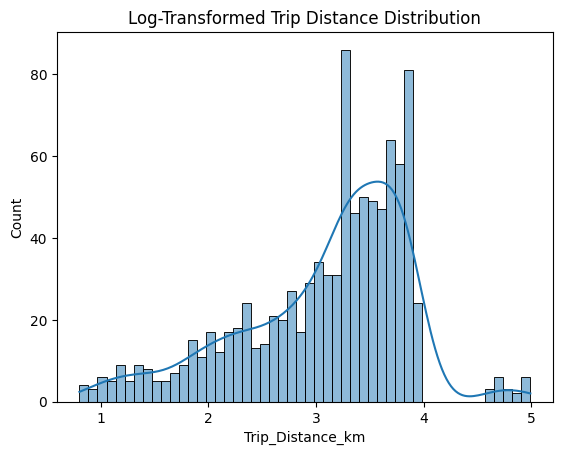

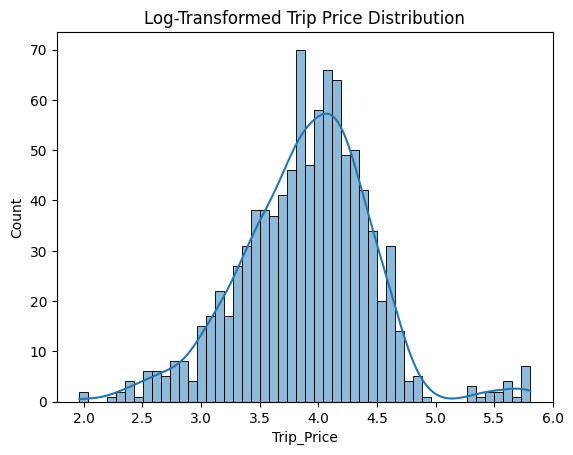

In [22]:
# Visualize the transformed data
sns.histplot(X["Trip_Distance_km"], bins=50, kde=True)
plt.title("Log-Transformed Trip Distance Distribution")
plt.show()

sns.histplot(Y, bins=50, kde=True)
plt.title("Log-Transformed Trip Price Distribution")
plt.show()

### Handling Outliers in Trip Distance and Trip Price  
In our dataset, we identified outliers in trip distance and trip price, where some trips were significantly longer and more expensive than others. Instead of removing these outliers, we applied log transformation to normalize the data.  

## Why We Did Not Remove Outliers?  

- **Real-world Relevance:** The long trips and high prices are valid, not data errors.  
- **Preserving Model Accuracy:** Removing them would reduce our model’s ability to predict long-distance rides.  
- **Better Alternative – Log Transformation:** Instead of removing data, we used log transformation to reduce skewness and improve linear regression performance.  

## Method Used – Log Transformation  

- We applied the natural logarithm (`log1p`) to both trip distance and trip price.  
- This transformation compressed large values, making the data more normally distributed, which helps linear regression perform better.  

## Conclusion  
Using log transformation instead of removing outliers allows us to keep all valuable data while ensuring that our linear regression model produces more accurate and reliable predictions.  


##### **1.4. Identifying and handling duplicate Values **

In [23]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


## **2. Identifying and Encoding Categorical Features**
In this lab task, we applied Ordinal Encoding to features with a natural order (Time_of_Day, Traffic_Conditions) and One-Hot Encoding to nominal features (Day_of_Week, Weather) since they have no ranking. This ensures proper handling of categorical data for the Linear Regression model.

In [24]:
#Ensure categorical data is of type str before encoding
X['Time_of_Day'] = X['Time_of_Day'].astype(str)
X['Traffic_Conditions'] = X['Traffic_Conditions'].astype(str)
X['Weather'] = X['Weather'].astype(str)
X['Day_of_Week'] = X['Day_of_Week'].astype(str)

In [25]:
# Define order for ordinal variables
ordinal_mapping = [
    ['Morning', 'Afternoon', 'Evening', 'Night'],  # Time_of_Day order
    ['Low', 'Medium', 'High']  # Traffic_Conditions order
]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping, handle_unknown='use_encoded_value', unknown_value=-1)

# Encode the columns
X[['Time_of_Day', 'Traffic_Conditions']] = ordinal_encoder.fit_transform(X[['Time_of_Day', 'Traffic_Conditions']])

In [26]:

# Initialize One-Hot Encoder
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Ensure categorical columns are of type string
X[['Day_of_Week', 'Weather']] = X[['Day_of_Week', 'Weather']].astype(str)

# Fit and transform the categorical columns
encoded_columns = ohe_encoder.fit_transform(X[['Day_of_Week', 'Weather']])

# Convert the transformed array back to a DataFrame with meaningful column names
ohe_feature_names = ohe_encoder.get_feature_names_out(['Day_of_Week', 'Weather'])
X[ohe_feature_names] = encoded_columns

# Drop the original columns (optional)
X.drop(columns=['Day_of_Week', 'Weather'], inplace=True)


In [27]:
X.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Passenger_Count,0
Traffic_Conditions,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0
Day_of_Week_Weekend,0
Weather_Rain,0


In [28]:
X.head()

,Trip_Distance_km,Time_of_Day,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Day_of_Week_Weekend,Weather_Rain,Weather_Snow
0,3.013081,0.0,3.0,0.0,3.56,0.80,0.32,53.82,0.0,0.0,0.0
1,3.634159,2.0,1.0,2.0,2.70,1.21,0.15,37.27,1.0,0.0,0.0
2,3.444576,2.0,4.0,0.0,3.48,0.51,0.15,116.81,0.0,0.0,0.0
3,3.291010,2.0,3.0,2.0,2.93,0.63,0.32,22.64,0.0,0.0,0.0
4,2.265921,1.0,2.0,1.0,2.55,1.71,0.48,89.33,1.0,0.0,0.0


## **3. Data Normalization**

In [29]:
# scaler = StandardScaler()
# X[num_cols] = scaler.fit_transform(X[num_cols])

In [30]:
# Define features and target variable
X_single = X[['Trip_Distance_km']]  # Selecting only one feature for simple linear regression


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_single, Y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 0.1568
Root Mean Squared Error (RMSE): 0.3959


In [33]:
#Results
print("Single Variable Model:")
print(f"Coefficient: {lin_reg.coef_[0]:.4f}")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Single Variable Model:
Coefficient: 0.5214
Intercept: 2.2805
Mean Squared Error (MSE): 0.1568
Root Mean Squared Error (RMSE): 0.3959


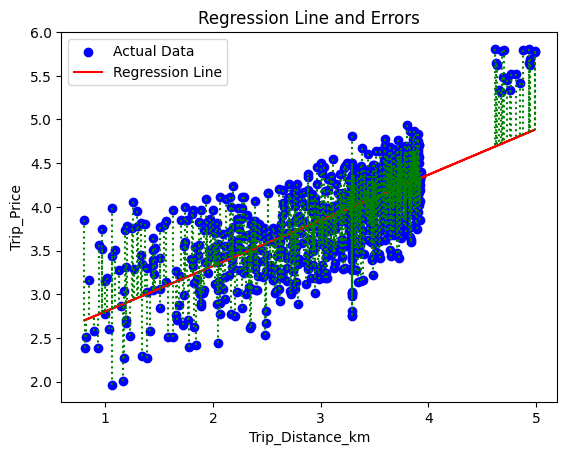

In [34]:
# Scatter plot of actual data
plt.scatter(X_single, Y, color='blue', label='Actual Data')

# Regression line
plt.plot(X_single, lin_reg.predict(X_single), color='red', label='Regression Line')

# Drawing error lines (residuals)
for i in range(len(X_single)):
    plt.plot([X_single.iloc[i, 0], X_single.iloc[i, 0]],
             [Y.iloc[i], lin_reg.predict(X_single)[i]],
             color='green', linestyle='dotted')

# Labels and title
plt.xlabel('Trip_Distance_km')
plt.ylabel('Trip_Price')
plt.title('Regression Line and Errors')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

R² Score: 0.4818


A higher R² (closer to 1) means a better fit.